# Интегрирование функций

Постановка задачи: вычислить определенный интеграл 

$$
\int_a^{b} f(x)\, dx
$$

для данной функции $f(x)$ в заданных пределах от $a$ до $b$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
%matplotlib inline

In [2]:
def f(x):
    return (x - 1)**3 + 0.5

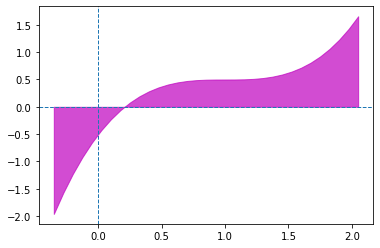

In [3]:
xx = np.linspace(-0.5, 2.5, 41)

a, b = -0.4, 2.1

xxx = xx[(a < xx) & (xx < b)]
plt.fill_between(xxx, f(xxx), alpha=0.7, color='m')
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)

## Использование библиотеки SciPy

In [4]:
from scipy.integrate import quad

a, b = -0.4, 2.1
quad(f, a, b)

(0.6556250000000003, 1.9706427010952404e-14)


## Формулы Ньютона-Котеса

Рассмотрим разбиение интервала интегрирования

$$
a = x_0 < x_1 < \dots < x_{N_1} < x_N = b \;.
$$

На каждом *элементарном интервале*, $[x_j, x_{j+1}]$, аппроксимируем значение интеграла. Просуммировав результаты, получаем *составную формулу*, которая в пределе $N\to\infty$ дает точное значение интеграла.

Правило *левых прямоугольников*,


$$
\int_{x_0}^{x_0 + h} f(x)\, dx \approx f(x_0) \, h\;,
$$

является точным для кусочно-постоянных функций. Нетрудно показать, что погрешность составной формулы левых прямоугольников шкалируется линейно с размером шага разбиения, $\sim 1/N$.

In [5]:
def lrect(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*j
        summ += f(x) * h
    return summ

In [6]:
for n in (10, 100, 1000, 10000):
    res = lrect(lambda x: x**3, 0, 1, n)
    print("%5.5g : %g" % (n,  res - 0.25))

   10 : -0.0475
  100 : -0.004975
 1000 : -0.00049975
10000 : -4.99975e-05


Правило *средних прямоугольников*,

$$
\int_{x_0}^{x_0 + h} f(x)\,dx \approx f(x_0 + \frac{h}{2}) \, h\;,
$$

является точным для линейной функции $f(x)$, поэтому погрешность составной формулы $\sim 1/N^2$.

Заметим, что правило средних прямоугольников является примером *открытой* квадратурной формулы, не требующей вычисления значения подинтегральной функции на границах интервала интегрирования.

In [7]:
def crect(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*(j + 0.5)
        summ += f(x)
    return summ * h

In [8]:
for n in (10, 100, 1000, 10000):
    print("%5.5g : %g" % (n, crect(lambda x: x**3, 0, 1, n) - 0.25))

   10 : -0.00125
  100 : -1.25e-05
 1000 : -1.25e-07
10000 : -1.25e-09


Для построения квадратурных формул высших порядков рассмотрим элементарный интервал $[0, 1]$. (Заметим, что ограничения общности тут нет, т.к. любой интервал $[x_0, x_0 + h]$ линейным преобразованием приводится к интервалу $[0, 1]$).


Используем метод неопределенных коэффициентов: Представим значение интеграла как линейную комбинацию значений подынтегральной функции в $k+1$ точках, и подберем коэффициенты так, чтобы результат был бы точным для функций $x^0$, $x^1$, $\dots$, $x^k$. 

Например, построим трехточечную схему (т.е. *метод Симпсона*).

Положим 

$$
\int_0^1 f(x)\, dx = a f(x_0) + b f(x_1) + c f(x_2)\;,
$$
где $x_0 = 0$, $x_1 = \dfrac{1}{2}$, $x_2 = 1$ (т.е. $h=\dfrac{1}{2}$). 

Подберем коэффициенты $a$, $b$ и $c$ исходя из условий:

$$
\begin{matrix}
f(x) = 1 :& \qquad  &1            &= &a + &b + &c \;, \\
f(x) = x :& \qquad  &\dfrac{1}{2} &= &&\dfrac{1}{2}b + &c\;, \\
f(x) = x^2: &\qquad &\dfrac{1}{3} &= &&\dfrac{1}{4}b + &c \;.  
\end{matrix}
$$

В качестве решения имеем $a = c = \dfrac{1}{6}$ и $b = \dfrac{2}{3}$. Таким образом

$$
\begin{aligned}
\int_0^1 f(x) \,dx &\approx \frac{1}{6} \left( f_0 + 4 f_1 + f_2 \right) \\
                   &= \frac{1}{3} h \left(f_0 + 4f_1 + f_2 \right) \;.
\end{aligned}
$$

### Метод Ромберга


Предположим, что мы вычислили приближение $I_N$ интеграла $I$, такое что

$$
I_N = I + \gamma N^{-2} + \dots
$$


Тогда

$$
I^{(1)} = \frac{4 I_{2N} - I_N}{4 - 1}
$$

представляет собой улучшенное приближение точного значения интеграла $I$.

При вычислении производных мы эту технологию встречали под именем *экстраполяции Ричардсона*.

На этом месте большинство учебников останавливаются. А мы, наоборот, продолжим.

### Прежде чем приниматься вычислять интеграл, необходимо убедиться, что он существует

Например,

$$
\int_0^{\pi^2/4}\! \frac{dx}{\sin{x}}
$$

### Интегрируемые сингулярности


Например,

$$
I = \int_0^{\pi^2/4}\! \frac{dx}{\sin{\sqrt{x}}}
$$

Прибавим и вычтем член, имеющий такую же особенность на нижнем пределе интегрирования:

$$
\begin{aligned}
I &= \int_0^{\pi^2/4} \frac{dx}{\sin{\sqrt{x}}} \\
  &= \int_0^{\pi^2/4} \!dx \left( \frac{1}{\sin{\sqrt{x}}} - \frac{1}{\sqrt{x}} + \frac{1}{\sqrt{x}} \right) \\
  &= \int_0^{\pi^2/4} \!dx \left( \frac{1}{\sin{\sqrt{x}}} - \frac{1}{\sqrt{x}}  \right)  + \pi\;.
\end{aligned}
$$

Теперь оставшийся интеграл на нижнем пределе регулярен. Следует, однако, обратить внимание на возможную потерю точности при вычислении подынтегральной функции при малых значениях $x$.

## Адаптивные методы


Традиционно, методы Ньютона-Котеса формулируются на сетках с постоянным шагом. Если подынтегральная функция имеет резкие пики, равномерная сетка, очевидно, неоптимальна.

In [9]:
def f(x):
    return 1.0 / (1.0 + x)**3

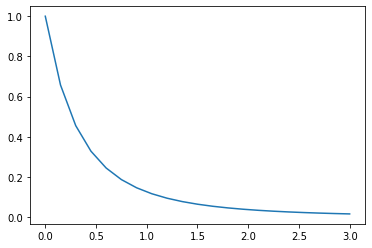

In [10]:
a, b = 0, 3
xx = np.linspace(a, b, 21)
plt.plot(xx, f(xx))

### Простейшая идея: 

Используем метод средних прямоугольников, на каждом шаге разбиваем на две части прямоугольник максимальной площади.

Text(0.7, 0.7, 'Step 3.')

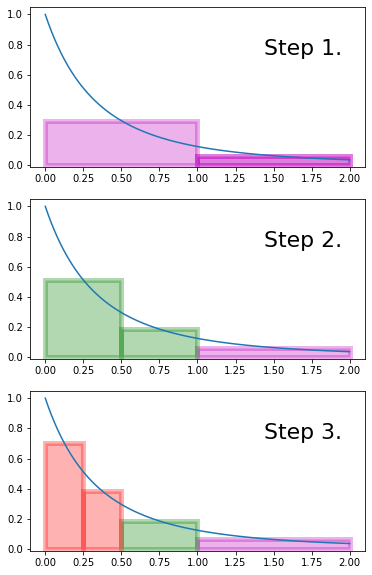

In [11]:
import matplotlib.patches as patches

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 10))

a, b = 0, 2
xx = np.linspace(a, b, 101)
ax1.plot(xx, f(xx))


# two rectangles
w, h = (a+b)/2., f((a+b)/4.)
ax1.add_patch(patches.Rectangle((0, 0), w, h, color='m', alpha=0.3, lw=5) )
ax1.add_patch(patches.Rectangle((w, 0), w, f(3/4*b), color='m', alpha=0.5, lw=5))
ax1.text(0.7, 0.7, 'Step 1.', transform=ax1.transAxes, fontsize=22)

# three rectangles
ax2.plot(xx, f(xx))
xs = [0, b/4, b/2]
ws = [b/4, b/4, b/2]
hs = [f(b/8), f(3*b/8), f(3*b/4)]
cs = ['g', 'g', 'm']
for j in [2, 1, 0]:
    ax2.add_patch(patches.Rectangle((xs[j], 0), ws[j], hs[j], color=cs[j], alpha=0.3, lw=5))
ax2.text(0.7, 0.7, 'Step 2.', transform=ax2.transAxes, fontsize=22)
    
# four rectangles:
ax3.plot(xx, f(xx))

xs = [0, b/8, b/4, b/2]
ws = [b/8, b/8, b/4, b/2]
hs = [f(b/16), f(b/8 + b/16), f(3*b/8), f(3*b/4)]
cs = ['r', 'r', 'g', 'm']
for j in [3, 2, 1, 0]:
    ax3.add_patch(patches.Rectangle((xs[j], 0), ws[j], hs[j], color=cs[j], alpha=0.3, lw=5))
ax3.text(0.7, 0.7, 'Step 3.', transform=ax3.transAxes, fontsize=22)

In [12]:
# A rectangle is (start, width)
# A list element is (-weight, (start, width))

def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (-f(xm) * rect[1], rect)
    

def get_max_elem(lst, key=None):
    """Find and remove the maximum element from the list.
    
    Find the max element (according to the parameter `key`, which is a callable),
    remove it from the list, and return both the element and the rest.
    """
    if key is None:
        # use the identity function
        key = lambda x: x
    
    # find the max element
    elem = max(lst, key=key)
    
    # find its position in the list
    idx = lst.index(elem)
    
    return elem, lst[:idx] + lst[idx+1:]

    
def adapt_rect_list(f, a, b, npts):
    """Integrate f(x) from a to b using npts steps of the adaptive algorithm.
    """
    lst = []

    # start from a single rectangle
    item = make_rect(a, b, f)
    lst.append(item)
    
    # loop
    for _ in range(npts):
        # get the largest one
        rect, lst = get_max_elem(lst, lambda x: -x[0])
        w, (start, width) = rect
                
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
        lst.append(rect1)
        lst.append(rect2)
        
    # collect the answer
    return -sum(w for w, r in lst), lst

In [13]:
def f(x):
    return np.exp(-x)
a, b = 0, 20

for n in (5, 25, 125, 250, 500, 1000, 5000):
    res, lst = adapt_rect_list(f, a, b, n)
    print ('n = ', n, '; res = ', res, sep='')


n = 5; res = 0.9552698388347781
n = 25; res = 0.9786718962428081
n = 125; res = 0.9956502001607699
n = 250; res = 0.9959491604791242
n = 500; res = 0.9960027891786778
n = 1000; res = 0.9997391610745809
n = 5000; res = 0.999940521244624


In [14]:
%timeit adapt_rect_list(f, a, b, npts=1000)

103 ms ± 2.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Вопросы для практических занятий и самостоятельной работы:

1. Написать программу интегрирования заданной функции методом *правых* прямоугольников. Сравнить скорость сходимости метода с методами левых и средних прямоугольников.

2. Написать программу интегрирования заданной функции методом Симпсона. Сравнить скорость сходимости метода с методом средних прямоугольников.

1. Вычислить интеграл $\int_0^{\pi^2/4} dx \,/ \sin{\sqrt{x}}$ прямым вычислением и с вычитанием сингулярности. Обсудить скорость сходимости.

2. Разработать программу реализующую интегрирование заданной функции методом средних прямоугольников (или иным методом, на выбор) с адаптивной сеткой. Сравнить скорость сходимости данного метода и метода с равномерной сеткой.
*Указание: для выбора "наибольшего" интервала используйте модуль `heapq` из стандартной библиотеки. (При использовании языка `C++`, используйте `std::set`).* 

3. Вычислить зависимость плотности энергии идеального Ферми газа от температуры при фиксированной плотности частиц.

4. Вычислить зависимость теплоемкости идеального Бозе-газа от температуры. Обратить особое внимание на область температур вблизи области фазового перехода с появлением Бозе-конденсата.

5. При температурах ниже критических, изотермы газа Ван-дер-Ваальса содержат участки постоянного давления, $p(V)=\mathrm{const}$. Положение данных участков определяется согласно конструкции Максвелла, требующей равенства значений интегралов $\int p\,dV$ по участкам изотерм в области сосуществования фаз. Разработать программу, вычисляющую положения горизонтальных участков изотерм для газа Ван-дер-Ваальса.


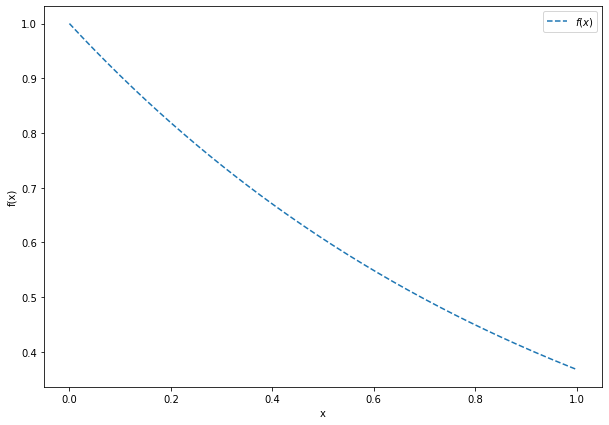

In [15]:
#  1 question:


def ff(x):
    return np.exp(-x)


a = 0
b = 1

x = np.linspace(a, b, 200)
plt.figure(figsize=(10, 7))
plt.plot(x, ff(x), '--', label = '$f(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [16]:
fleft = []


xx = np.arange(1, 100, 1)
for n in xx:
    fleft.append([n, lrect(ff, a, b, n)])
    print("%5.5g : %g" % (n, lrect(ff, a, b, n)))

    1 : 1
    2 : 0.803265
    3 : 0.743316
    4 : 0.714424
    5 : 0.697438
    6 : 0.68626
    7 : 0.678347
    8 : 0.672451
    9 : 0.667889
   10 : 0.664253
   11 : 0.661289
   12 : 0.658825
   13 : 0.656745
   14 : 0.654965
   15 : 0.653425
   16 : 0.65208
   17 : 0.650895
   18 : 0.649842
   19 : 0.648901
   20 : 0.648055
   21 : 0.64729
   22 : 0.646596
   23 : 0.645962
   24 : 0.645381
   25 : 0.644847
   26 : 0.644355
   27 : 0.643899
   28 : 0.643476
   29 : 0.643082
   30 : 0.642714
   31 : 0.642371
   32 : 0.642049
   33 : 0.641747
   34 : 0.641462
   35 : 0.641194
   36 : 0.640941
   37 : 0.640701
   38 : 0.640474
   39 : 0.640259
   40 : 0.640055
   41 : 0.639861
   42 : 0.639676
   43 : 0.639499
   44 : 0.639331
   45 : 0.63917
   46 : 0.639016
   47 : 0.638869
   48 : 0.638728
   49 : 0.638593
   50 : 0.638463
   51 : 0.638338
   52 : 0.638218
   53 : 0.638103
   54 : 0.637992
   55 : 0.637885
   56 : 0.637781
   57 : 0.637682
   58 : 0.637586
   59 : 0.637493
   60 : 

In [17]:
fcent = []

xx = np.arange(1, 1000, 10)
for n in xx:
    fcent.append([n, crect(ff, a, b, n)])
    print("%5.5g : %g" % (n, crect(ff, a, b, n)))

    1 : 0.606531
   11 : 0.631903
   21 : 0.632061
   31 : 0.632093
   41 : 0.632105
   51 : 0.63211
   61 : 0.632113
   71 : 0.632115
   81 : 0.632117
   91 : 0.632117
  101 : 0.632118
  111 : 0.632118
  121 : 0.632119
  131 : 0.632119
  141 : 0.632119
  151 : 0.632119
  161 : 0.63212
  171 : 0.63212
  181 : 0.63212
  191 : 0.63212
  201 : 0.63212
  211 : 0.63212
  221 : 0.63212
  231 : 0.63212
  241 : 0.63212
  251 : 0.63212
  261 : 0.63212
  271 : 0.63212
  281 : 0.63212
  291 : 0.63212
  301 : 0.63212
  311 : 0.63212
  321 : 0.63212
  331 : 0.63212
  341 : 0.63212
  351 : 0.63212
  361 : 0.63212
  371 : 0.63212
  381 : 0.63212
  391 : 0.63212
  401 : 0.63212
  411 : 0.63212
  421 : 0.63212
  431 : 0.63212
  441 : 0.63212
  451 : 0.63212
  461 : 0.63212
  471 : 0.63212
  481 : 0.63212
  491 : 0.63212
  501 : 0.63212
  511 : 0.63212
  521 : 0.63212
  531 : 0.63212
  541 : 0.63212
  551 : 0.63212
  561 : 0.63212
  571 : 0.63212
  581 : 0.63212
  591 : 0.63212
  601 : 0.63212
  611 : 0

In [18]:
def rrect(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h * (j + 1)
        summ += f(x) * h
    return summ


fright = []


xx = np.arange(1, 1000, 10)
for n in xx:
    fright.append([n, rrect(ff, a, b, n)])
    print("%5.5g : %g" % (n, rrect(ff, a, b, n)))

    1 : 0.367879
   11 : 0.603823
   21 : 0.61719
   31 : 0.62198
   41 : 0.624443
   51 : 0.625944
   61 : 0.626953
   71 : 0.627679
   81 : 0.628227
   91 : 0.628654
  101 : 0.628996
  111 : 0.629277
  121 : 0.629512
  131 : 0.629711
  141 : 0.629882
  151 : 0.63003
  161 : 0.630159
  171 : 0.630274
  181 : 0.630376
  191 : 0.630467
  201 : 0.630549
  211 : 0.630624
  221 : 0.630692
  231 : 0.630753
  241 : 0.63081
  251 : 0.630862
  261 : 0.63091
  271 : 0.630955
  281 : 0.630996
  291 : 0.631035
  301 : 0.631071
  311 : 0.631105
  321 : 0.631136
  331 : 0.631166
  341 : 0.631194
  351 : 0.631221
  361 : 0.631245
  371 : 0.631269
  381 : 0.631291
  391 : 0.631313
  401 : 0.631333
  411 : 0.631352
  421 : 0.63137
  431 : 0.631388
  441 : 0.631404
  451 : 0.63142
  461 : 0.631435
  471 : 0.63145
  481 : 0.631464
  491 : 0.631477
  501 : 0.63149
  511 : 0.631502
  521 : 0.631514
  531 : 0.631526
  541 : 0.631537
  551 : 0.631547
  561 : 0.631557
  571 : 0.631567
  581 : 0.631577
  591 

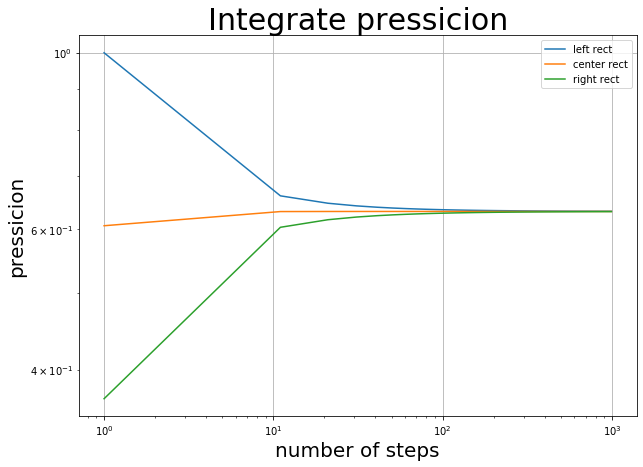

In [19]:
plt.figure(figsize=(10, 7))
plt.grid()
plt.title('Integrate pressicion', fontsize=30)
plt.xlabel('number of steps', fontsize = 20)
plt.ylabel('pressicion', fontsize = 20)
plt.loglog(xx, [lrect(f, a, b, h) for h in xx], label = 'left rect')
plt.loglog(xx, [crect(f, a, b, h) for h in xx], label = 'center rect')
plt.loglog(xx, [rrect(f, a, b, h) for h in xx], label = 'right rect')
plt.legend()

In [20]:
#  question 2

def simps(f, a, b, npts):
    h = (b - a)/n # need to cast 'n' as float in order to avoid
    # integer division
    sum1 = 0
    for i in range(1, int(n/2) + 1):
        sum1 += f(a + (2*i - 1)*h)
    sum1 *= 4
    sum2 = 0
    for i in range(1, int(n/2)): # range must be ints: range() integer 
    #end argument expected, got float.
        sum2 += f(a + 2*i*h)
    sum2 *= 2
    approx = (b - a)/(3.0*n)*(f(a) + f(b) + sum1 + sum2)
    return approx



for n in xx:
    print("%5.5g : %g" % (n, simps(ff, a, b, n)))
    


    1 : 0.45596
   11 : 0.596049
   21 : 0.613894
   31 : 0.61993
   41 : 0.622964
   51 : 0.624788
   61 : 0.626007
   71 : 0.626878
   81 : 0.627532
   91 : 0.628041
  101 : 0.628448
  111 : 0.628781
  121 : 0.629059
  131 : 0.629294
  141 : 0.629496
  151 : 0.629671
  161 : 0.629824
  171 : 0.629959
  181 : 0.630079
  191 : 0.630186
  201 : 0.630283
  211 : 0.63037
  221 : 0.63045
  231 : 0.630522
  241 : 0.630589
  251 : 0.63065
  261 : 0.630707
  271 : 0.630759
  281 : 0.630807
  291 : 0.630853
  301 : 0.630895
  311 : 0.630934
  321 : 0.630972
  331 : 0.631006
  341 : 0.631039
  351 : 0.63107
  361 : 0.631099
  371 : 0.631127
  381 : 0.631153
  391 : 0.631178
  401 : 0.631201
  411 : 0.631224
  421 : 0.631245
  431 : 0.631265
  441 : 0.631285
  451 : 0.631303
  461 : 0.631321
  471 : 0.631338
  481 : 0.631354
  491 : 0.63137
  501 : 0.631385
  511 : 0.631399
  521 : 0.631413
  531 : 0.631427
  541 : 0.63144
  551 : 0.631452
  561 : 0.631464
  571 : 0.631475
  581 : 0.631486
  591

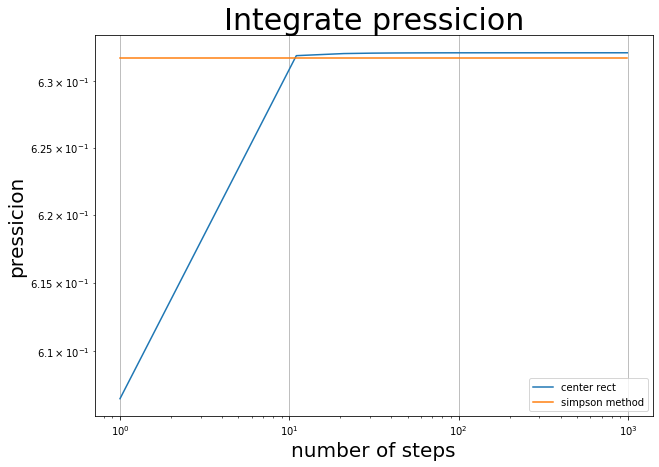

In [21]:
plt.figure(figsize=(10, 7))
plt.grid()
plt.title('Integrate pressicion', fontsize=30)
plt.xlabel('number of steps', fontsize = 20)
plt.ylabel('pressicion', fontsize = 20)
plt.loglog(xx, [crect(ff, a, b, h) for h in xx], label = 'center rect')
plt.loglog(xx, [simps(ff, a, b, h) for h in xx], label = 'simpson method')
plt.legend()

### question 3
#### Вычислить интеграл $\int_0^{\pi^2/4} dx \,/ \sin{\sqrt{x}}$ прямым вычислением и с вычитанием сингулярности. Обсудить скорость сходимости.

In [22]:
# 1 

print('crect = ', crect(lambda x: np.sin(x**0.5), 0, (np.pi**2 / 4), 100000))
print('simpson = ', simps(lambda x: np.sin(x**0.5), 0, (np.pi**2 / 4), 100000))
print('scipy = ', quad(lambda x: np.sin(x**0.5), 0, (np.pi**2 / 4)))
print(quad(lambda x: np.sin(x**0.5), 0, (np.pi**2 / 4))[0] - \
      crect(lambda x: np.sin(x**0.5), 0, (np.pi**2 / 4), 100000))
print(quad(lambda x: np.sin(x**0.5), 0, (np.pi**2 / 4))[0] - \
      simps(lambda x: np.sin(x**0.5), 0, (np.pi**2 / 4), 100000))
print('\nsingularity:\n')

print('crect = ', crect(lambda x: (np.sin(x**0.5) - x**0.5) , 0, (np.pi**2 / 4), 100000) + \
     crect(lambda x: (x**0.5) , 0, (np.pi**2 / 4), 100000))  
print('simpson = ', simps(lambda x: (np.sin(x**0.5) - x**0.5), 0, (np.pi**2 / 4), 100000) + \
     simps(lambda x: (x**0.5) , 0, (np.pi**2 / 4), 100000))

l = quad(lambda x: np.sin(x**0.5) - x**0.5, 0, (np.pi**2 / 4))
l = np.asarray(l)
s = quad(lambda x: x**0.5, 0, (np.pi**2 / 4))
s = np.asarray(s)
print('scipy = ', l + s)

crect =  2.0000000074626456
simpson =  1.997500104319253
scipy =  (1.9999999999999993, 3.973554818514913e-10)
-7.46264627871085e-09
0.002499895680746267

singularity:

crect =  2.00000000746265
simpson =  1.9975001043192542
scipy =  [2.00000000e+00 4.58241898e-09]


## question 4
### Разработать программу реализующую интегрирование заданной функции методом средних прямоугольников (или иным методом, на выбор) с адаптивной сеткой. Сравнить скорость сходимости данного метода и метода с равномерной сеткой.
*Указание: для выбора "наибольшего" интервала используйте модуль `heapq` из стандартной библиотеки. (При использовании языка `C++`, используйте `std::set`).* 

In [23]:
#  метод средних прямоугольников

print('center rectangular without adapting: \n')
for n in (5, 10, 25, 50, 100, 150, 300, 500, 1000, 2500, 5000, 7500):
    print("%5.5g : %g" % (n, crect(ff, a, b, n)))

print('\n')
%timeit crect(ff, a, b, npts=2500)


print('\n\n\ncenter rectangular with adapting: \n')
for n in (5, 10, 25, 50, 100, 150, 300, 500, 1000, 2500, 5000, 7500, 10000):
    res, lst = adapt_rect_list(ff, a, b, n)
    print ("%5.5g : %g" % (n, res))

print('\n')
%timeit adapt_rect_list(ff, a, b, npts=2500)

center rectangular without adapting: 

    5 : 0.631068
   10 : 0.631857
   25 : 0.632078
   50 : 0.63211
  100 : 0.632118
  150 : 0.632119
  300 : 0.63212
  500 : 0.63212
 1000 : 0.632121
 2500 : 0.632121
 5000 : 0.632121
 7500 : 0.632121


3.45 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



center rectangular with adapting: 

    5 : 0.631244
   10 : 0.631862
   25 : 0.632074
   50 : 0.632109
  100 : 0.632117
  150 : 0.632119
  300 : 0.63212
  500 : 0.63212
 1000 : 0.632121
 2500 : 0.632121
 5000 : 0.632121
 7500 : 0.632121
10000 : 0.632121


624 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
adapts=[]
withoutadapt=[]
x = np.arange(1, 1000, 10)
for n in x:
    res, lst = adapt_rect_list(f, a, b, n)
    adapts.append(abs(2-res))
    res2=crect(ff, a, b, n)
    withoutadapt.append(abs(2-res2)) #мы знаем, что интеграл от нашей функции f на отрезке [0, 1] равен 2

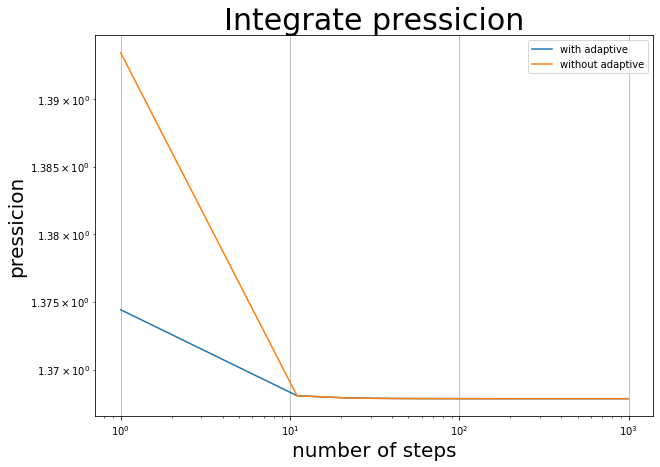

In [31]:
plt.figure(figsize=(10, 7))
plt.grid()
plt.title('Integrate pressicion', fontsize=30)
plt.xlabel('number of steps', fontsize = 20)
plt.ylabel('pressicion', fontsize = 20)
plt.loglog( x, adapts, "-", label='with adaptive' )
plt.loglog(x,withoutadapt, "-", label='without adaptive' )
plt.legend(loc='best')

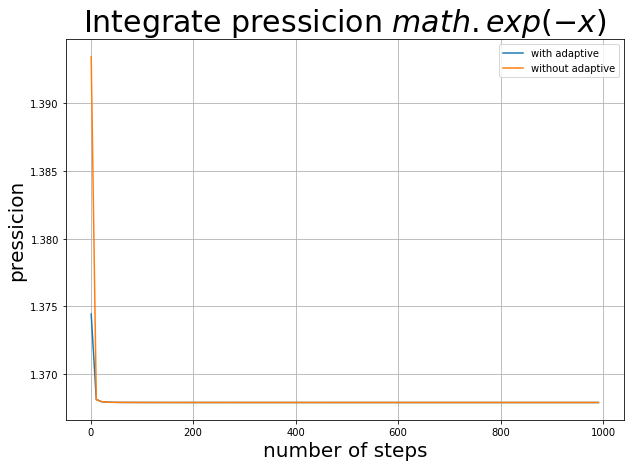

In [32]:
plt.figure(figsize=(10, 7))
plt.grid()
plt.title('Integrate pressicion $math.exp(-x)$', fontsize=30)
plt.xlabel('number of steps', fontsize = 20)
plt.ylabel('pressicion', fontsize = 20)
plt.plot( x, adapts, "-", label='with adaptive' )
plt.plot(x,withoutadapt, "-", label='without adaptive' )
plt.legend(loc='best')

Использование адаптивного метода позволяет быстрее приблизиться к правильному решению: ошибка убывает быстрее, но время требуется больше